In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [6]:
data = pd.read_csv('/content/Superstore.csv', encoding='windows-1252')

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
data.shape

(9994, 21)

In [10]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Data Cleaning

In [11]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

theres are no missing values in the dataset


now checking if there's any duplicates in the data

In [12]:
data.duplicated().sum()

0

the output tells us there are no duplicates

In [ ]:
#data.drop_duplicates(inplace= True)

In [14]:
data['Profit Margin%'] = (data.Profit/data.Sales)*100
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin%
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


In [15]:
data.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin%
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,4,1862,3,17,1850,NaN,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,3203,19,6026,1523,48,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896,12.031393
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108,46.675435
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750,7.500000
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500,27.000000
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000,36.250000


### which category is best selling and most profitable

In [17]:
#group sales, profit and quantity by category

category_analysis = pd.DataFrame(data.groupby(['Category'])[['Sales','Profit', 'Quantity']].sum())

In [18]:
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


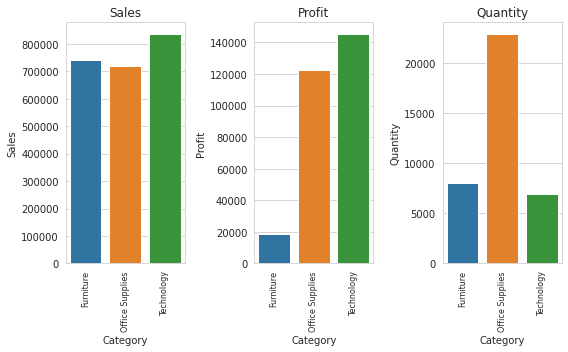

In [24]:
sns.set_style("whitegrid")
figure,axis=plt.subplots(1,3, figsize=(8,5))
cat = sns.barplot(x= category_analysis.index, y= category_analysis.Sales, ax=axis[0])
cat_2 = sns.barplot(x= category_analysis.index, y= category_analysis.Profit, ax=axis[1])
cat_3 = sns.barplot(x= category_analysis.index, y= category_analysis.Quantity, ax=axis[2])

#set titles
cat.set(title='Sales')
cat_2.set(title='Profit')
cat_3.set(title='Quantity')
#rotate axis for x-axis
plt.setp(cat.get_xticklabels(), rotation='vertical', size=8)
plt.setp(cat_2.get_xticklabels(), rotation='vertical', size=8)
plt.setp(cat_3.get_xticklabels(), rotation='vertical', size=8)
#set. spacing between subplots
figure.tight_layout()



* Technology is best selling in terms of sales graph
* Technology  is profitable but it lacks quantity
* `Furniture` makes good sale but makes `least sale` and `least quantity`
* `Office supplies` 3rd ranked in terms of `sales` and makes 2nd best in prfit and `1st` ranked in terms of quantity

### Exploratory Data Analysis

* what are the best selling and most profitable sub-category?

In [26]:
#group by sub-category

subcat_analysis = pd.DataFrame(data.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

#sort by descending order according to sales

sub_cat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending=False))

sub_cat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [28]:
#sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values("Profit",ascending=False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


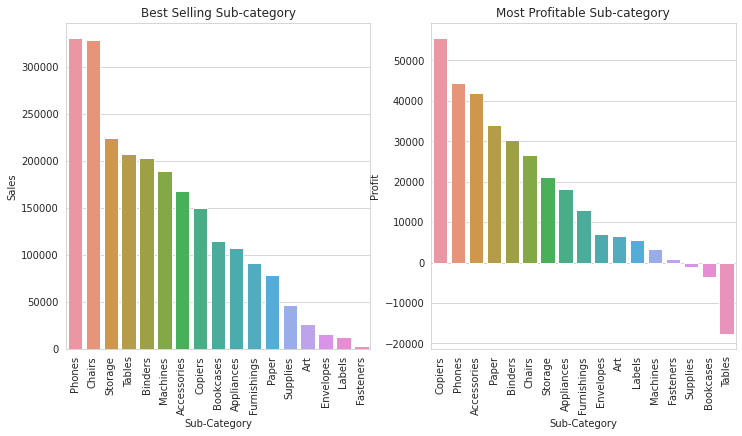

In [31]:
#plot bar plots
sns.set_style('whitegrid')
figure,axis= plt.subplots(1,2, figsize=(12,6))
#plot bar plot for best selling sub-category
subcat1 = sns.barplot(data=sub_cat_sales, x =sub_cat_sales.index,y= sub_cat_sales.Sales, ax=axis[0])
subcat1.set(title='Best Selling Sub-category')
subcat1.set_xticklabels(subcat1.get_xticklabels(), rotation='vertical', size=10)

#plot bar plot  for most profitable sub-category
subcat2 = sns.barplot(data=sub_cat_sales, x =subcat_profit.index,y= subcat_profit.Profit, ax=axis[1])
subcat2.set(title='Most Profitable Sub-category')
subcat2.set_xticklabels(subcat2.get_xticklabels(), rotation='vertical', size=10)

#set spacing between subplots

figure.tight_layout
plt.show()

* ` Phones and Chairs` are the best selling
* ` labels and fasteners` are lowest selling

* `copies and phones` are the most profitable
* ` fasterners` is the least profitable
* `tables` tend to be negative


### Which is the top selling sub-category?

In [32]:
subcat_quantity = pd.DataFrame(data.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=True))
subcat_quantity

,Quantity
Sub-Category,
Copiers,234
Machines,440
Supplies,647
Bookcases,868
Envelopes,906
Fasteners,914
Tables,1241
Labels,1400
Appliances,1729


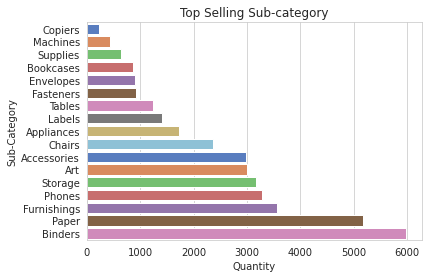

In [33]:
#plot bar ploy for top selling sub-category

sns.barplot(data= subcat_quantity, y = subcat_quantity.index, x=subcat_quantity.Quantity, palette='muted')
plt.title("Top Selling Sub-category")
plt.show()

* `Binders` are the top selling sub category
followed by `paper,furnishings,phone`

### Which customer segment is most profitable?

In [34]:
segment_analysis = pd.DataFrame(data.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


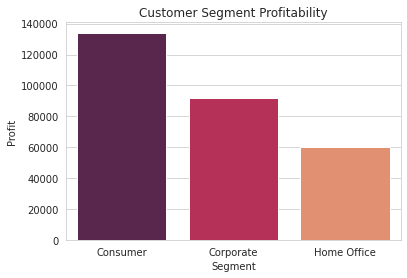

In [35]:
sns.barplot(data=segment_analysis, x=segment_analysis.index, y=segment_analysis.Profit, palette='rocket')
plt.title('Customer Segment Profitability')
plt.show()

* `Consumer` is the most profitable for customer segment

#### Which is the Preffered Ship Mode?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


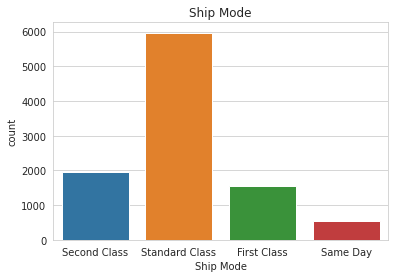

In [36]:
sns.countplot(data['Ship Mode'])
plt.title('Ship Mode')
plt.show()

* `Standard Class` has the highest  count and mostly preffered ship mode and obviously cheapest mode

#### Which region is the most profitable?

In [37]:
region_analysis = pd.DataFrame(data.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


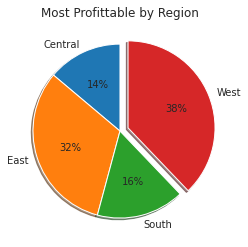

In [40]:
explode = [0,0,0,0.1]
plt.pie(region_analysis.Profit, labels=region_analysis.Region, startangle=90,
        autopct="%1.0f%%", explode=explode,
        shadow = True)
plt.title("Most Profittable by Region")
plt.show()

* `west and east` has the most profitable

#### which city has the highest number of sales?

In [41]:
city_sales = pd.DataFrame(data.groupby(['City'])['Sales','Quantity'].sum().sort_values('Sales', ascending=False))
top10 = city_sales[:10]
top10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,109077.0130,1981
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [43]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


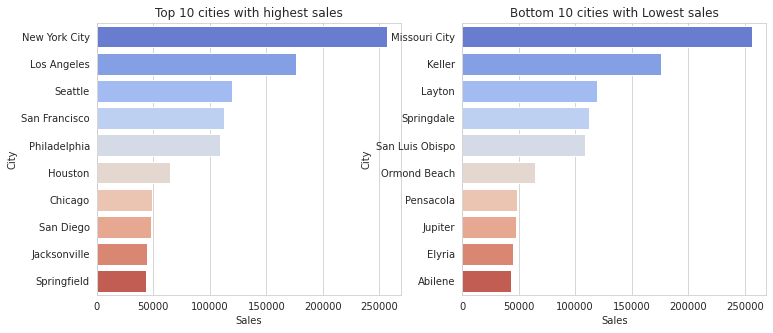

In [45]:
figure,axis = plt.subplots(1,2, figsize=(12,5))
sns.set_style("whitegrid")
top10c = sns.barplot(data=top10, y=top10.index, x=top10.Sales, palette='coolwarm', ax=axis[0])
top10c.set(Title='Top 10 cities with highest sales')
top10c.set_yticklabels(top10c.get_yticklabels(), size=10)
#plot bar plot for best  sub-category for last 10
bottom10c = sns.barplot(data=bottom10, y=bottom10.index, x=top10.Sales, palette='coolwarm', ax=axis[1])
bottom10c.set(Title='Bottom 10 cities with Lowest sales')
bottom10c.set_yticklabels(bottom10c.get_yticklabels(), size=10)

figure.tight_layout
plt.show()

* NY city is to targeted